# Linear Regression

### Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import math
%matplotlib inline

In [2]:
x_train, y_train = utils.load_data()
print(x_train,'\n')
print(y_train)
print('x_train: ', type(x_train), x_train.dtype, x_train.shape[0])
print('y_train: ', type(y_train), y_train.dtype, y_train.shape[0])

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369] 

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875


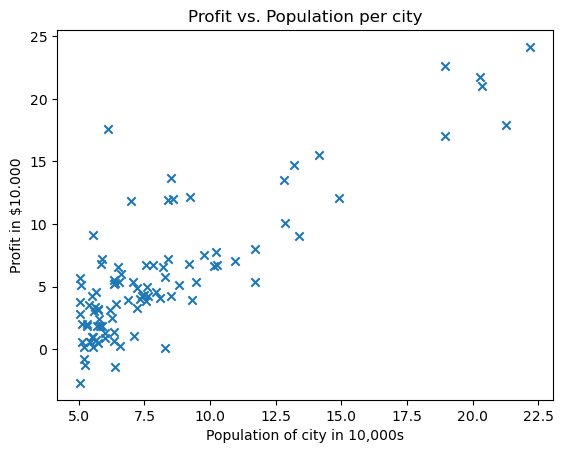

In [3]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, marker='x')
ax.set(title='Profit vs. Population per city', ylabel='Profit in $10.000', xlabel="Population of city in 10,000s");

### Compute cost function

In [4]:
def compute_cost(x: np.ndarray[float], y: np.ndarray[float], w: float, b: float) -> float: 
    m = x.shape[0] #size
    
    cost_sum = 0
    
    for i in range(0, m): 
        f_wb = np.dot(x[i], w) + b
        
        cost = (f_wb - y[i]) ** 2
        
        cost_sum += cost
    
    return (1/(2*m)) * cost_sum
        

In [5]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost), cost)
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'> 75.20338497891959
Cost at initial w: 75.203
All tests passed!


In [6]:
def compute_gradient(x: np.ndarray[float], y: np.ndarray[float], w: float, b: float) -> tuple[float, float]:
    m: float = x.shape[0] # size
    
    dj_dw = 0
    dj_db = 0
    
    dj_dw_sum = 0
    dj_db_sum = 0
    for i in range(0, m): 
        f_wb: float = np.dot(x[i], w) + b
        
        dj_dw_sum += (f_wb - y[i]) * x[i]
        dj_db_sum += f_wb - y[i]
        
    dj_db = dj_db_sum / m
    dj_dw = dj_dw_sum / m
    return dj_dw, dj_db

In [8]:

from typing import Callable
gradient_function_type = Callable[[np.ndarray[float], np.ndarray[float], float, float], tuple[float, float]]
gradient_descent_return_type = tuple[float, float, list[float], list[float]]

def gradient_descent(x: np.ndarray[float], y: np.ndarray[float], w_in: float, b_in: float, gradient_function: gradient_function_type, alpha: float, num_iters: int) -> gradient_descent_return_type: 
    m: int = x.shape[0]
    
    w = w_in
    b = b_in
    
    J_history: list[float] = []
    w_history: list[float] = []
    
    for i in range(0, num_iters): 
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        
        if i < 100000: 
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
            
    return w, b, J_history, w_history
    

In [9]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
# alpha = 0.01
alpha = 0.01

w, b, J_history, w_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [10]:
J_history

[6.737190464870008,
 5.931593568604957,
 5.901154707081387,
 5.89522858644422,
 5.890094943117333,
 5.885004158443646,
 5.879932480491416,
 5.874879094762575,
 5.8698439118063845,
 5.86482686531293,
 5.8598278899321805,
 5.85484692057229,
 5.849883892376585,
 5.844938740722035,
 5.840011401218365,
 5.835101809707228,
 5.830209902261389,
 5.825335615183866,
 5.820478885007098,
 5.8156396484921515,
 5.81081784262787,
 5.806013404630042,
 5.801226271940627,
 5.796456382226898,
 5.791703673380652,
 5.786968083517397,
 5.782249550975539,
 5.777548014315597,
 5.7728634123193805,
 5.768195683989212,
 5.76354476854712,
 5.758910605434048,
 5.754293134309077,
 5.7496922950486296,
 5.745108027745686,
 5.740540272709014,
 5.735988970462384,
 5.7314540617437935,
 5.7269354875047025,
 5.722433188909259,
 5.717947107333528,
 5.713477184364749,
 5.709023361800547,
 5.704585581648198,
 5.700163786123851,
 5.695757917651815,
 5.69136791886375,
 5.6869937325979825,
 5.682635301898705,
 5.678292570015293

In [11]:
w_history

[0.6532884974555673,
 0.8888949164626273,
 0.9610073805299465,
 1.0160217015468063,
 1.0579919151026862,
 1.090010829330244,
 1.114437935638548,
 1.1330732809334128,
 1.147290114064432,
 1.1581360812883905]

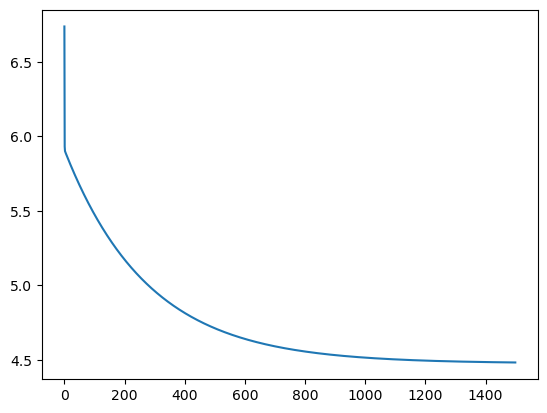

In [12]:
plt.plot(J_history);

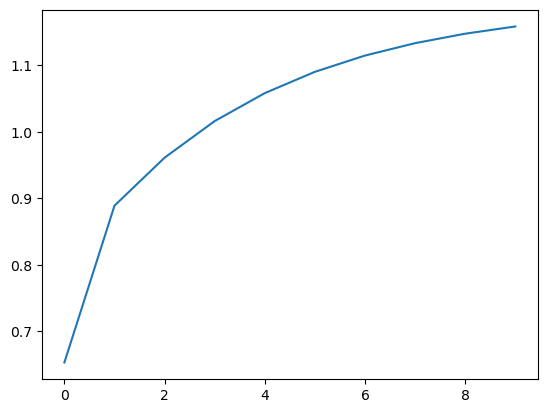

In [13]:
plt.plot(w_history);

In [14]:
m: int = x_train.shape[0]
predicted: np.ndarray[float] = np.zeros(m)

for i in range(0, m): 
    predicted[i] = w * x_train[i] + b
    
predicted

array([ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
        6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
        3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
        2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
        3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
       18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
        2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
        5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
        2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
        4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
        5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
        3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
        6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
        4.78874528,  6.04480089,  8.30859358,  2.78400167, 20.09

''

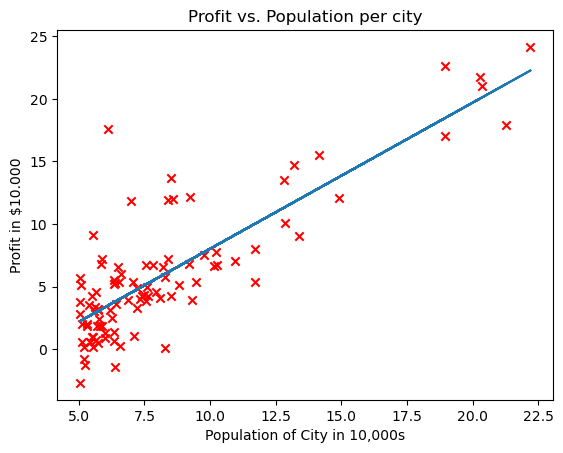

In [15]:
fig, ax = plt.subplots()
ax.plot(x_train, predicted)
ax.scatter(x_train, y_train, marker='x', c='r')

ax.set(title='Profit vs. Population per city', ylabel='Profit in $10.000', xlabel='Population of City in 10,000s')
;

In [16]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))


predict3 = 21 * w + b
print('For population = 210,000, we predict a profit of $%.2f' % (predict3*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
For population = 210,000, we predict a profit of $208633.18
